(sec:GaltWatExtinct)=
# Extinction of a Galton-Watson Process

(please read {numref}`sec:GenFxnsParadigm` and {numref}`sec:GenFxnsExamples` in parallel with this section)

In almost all applications of the Galton-Watson process, one of the main questions we want to answer is whether it goes extinct or not, *e.g.*:
- will a new cancer cell become a tumor?
- will an exposure to a pathogen result in disease?
- will an invasive species become established?

```{prf:definition} Extinction of a Galton-Watson Process
We say a Galton-Watson Process $\{X_g\}_{g \in \mathbb{N}}$ goes extinct if $X_g=0$ for some finite $g$.
```
If the process goes extinct, it remains $0$ for all future generations.


For calculating the extinction probability, it is easiest to think of the Galton-Watson process in terms of Galton-Watson trees, where eventual extinction corresponds to the tree being finite.  We will use the fact that each node and its descendents forms a Galton-Watson tree.  The entire tree is finite if and only if all sub-trees started from its offspring are also finite.

```{figure} ExtinctionPGF.png
---
width: 400px
name: fig-ExtinctionPGF
---
Assuming the direct offspring of the initial individual have probability $\alpha$ that their own descendents are finte, then the probability of extinction from the initial individual is $\alpha=p_0 + p_1 \alpha + p_2 \alpha^2 + \cdots = \mu(\alpha)$. 
```

Let $\alpha$ be the probability that the Galton-Watson process goes extinct.  If the first individual has $k$ offspring, then there are $k$ new Galton-Watson processes that begin, each of which has the same probability $\alpha$ of going extinct.  They are independent, so the probability of extinction from those $k$ offspring is $\alpha^k$.  

The joint probability that there are $k$ offspring and it goes extinct is $p_k \alpha^k$.  The extinction probability is thus the sum of $p_k \alpha^k$.
In other words,  $\alpha = \sum_{k=0}^\infty p_k \alpha^k = \mu(\alpha)$ where $\mu(x) = \sum_k p_k x^k$.  This function is the *Probability Generating Function* of the offspring distribution.

The equation $\alpha= \mu(\alpha)$ is a *consistency relation*.  It is not guaranteed that every solution to this equation is the extinction probability, but rather that one of the (possibly multiple) solutions is the extinction probability.

```{prf:example} Extinction Probability
Consider the case where the number of offspring is $0$, $1$, $2$, or $3$ with equal probability.  Then $\mu(x) = (1 + x + x^2 + x^3)/4$ and the extinction probability $\alpha$ solves $x=\mu(x)$.

The plots below of $y=x$ and $y=\mu(x)$ allow us to identify solutions of $x = \mu(x)$.  In this case, there are two solutions, one of which is $x=1$ and the other $x \approx 0.4$.  The solution $x=1$ is "spurious" - this is not the extinction probability.

The correct choice of solution in this case is $\alpha \approx 0.4$.  We will learn later how to determine which is the correct solution when there is more than $1$ solution.
```

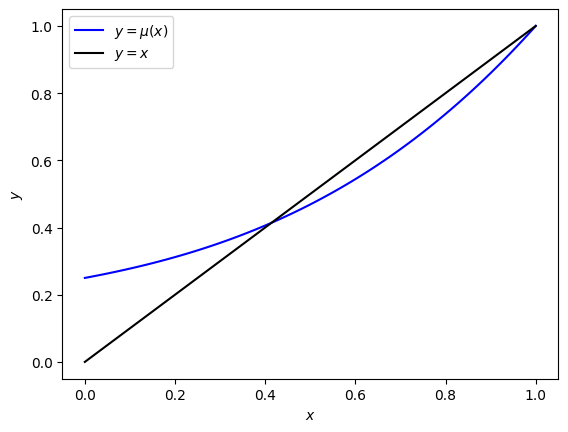

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,1,101)

def mu(x):
    return (1 + x + x**2 + x**3)/4

plt.plot(x, mu(x), color = 'blue', label = '$y=\\mu(x)$')
plt.plot(x,x, color = 'k', label = '$y=x$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()


```{prf:example} Extinction with a Geometric Offspring Distribution
:label: example-ExtGeomDist

Consider an organism that reproduces asexually according to the following rules:
- With probability $p$ the organism dies before reproducing.
- If it does not die first, then at the first time it reproduces it produces a single offspring.  
- Each time it reproduces, it has a probability $p$ of dying before reproducing again and $1-p$ of producing a single offspring.

This species has been accidentally introduced into Melbourne, and we would like to know the probability that it will persist long term.

The lifecycle for this species is similar to the definition of a geometric distribution, where "success" is death and "failure" is a reproduction event.  The probability generating function for a Geometric Distribution is given in {prf:ref}`example-GeomPGF`: $\mu(x)= \frac{px}{1-(1-p)x}$.  However, that distribution counts the success as well as the failures, so this corresponds to one more than the number of offspring produced here.  

To remove the death from our count, we use $\hat{\mu}(x) = \frac{1}{x} \mu(x) = \frac{p}{1-(1-p)x}$.  The extinction probability $\alpha$ must solve $x = \hat{\mu}(x)$:

\begin{align*}
x &= \frac{p}{1-(1-p)x}\\
x(1-(1-p)x) &= p\\
-(1-p)x^2 + x - p &= 0\\
-(1-p)\left(x^2 - \frac{x}{1-p} + \frac{p}{1-p}\right) &= 0\\
-(1-p) (x-1)\left(x-\frac{p}{1-p}\right) &= 0
\end{align*}
(to do the factoring in the final step, I took advantage of the fact I know $\hat{\mu}(1)=1$ for any PGF, so $x=1$ was guaranteed to be a root).  Thus $x=1$ or $x = p/(1-p)$.  If $p<1-p$, then $p/(1-p)<1$ and $\alpha = p/(1-p)$.  If $p \geq (1-p)$, then $p/(1-p) \geq 1$ and there is only one solution in $[0,1]$, so $\alpha = 1$. 

Since $p<1-p$ is equivalent to $p<0.5$, we conclude that 
- if $p<0.5$, then the extinction probability is $\alpha=p/(1-p)<1$.
- if $p \geq 0.5$, then the extinction probability is $\alpha=1$.
```

## Self-test

1. Explain why in {prf:ref}`example-ExtGeomDist` replacing $\mu(x)$ by $\hat{\mu}(x) = \mu(x)/x$ corresponds to reducing the values of the distribution by $1$.
2. Revisiting {prf:ref}`example-ExtGeomDist`:
   1. Create some plots of $\hat{\mu}(x)$ for values of $p$ above, below, and equal to $0.5$, and plot $y=x$
   2. What do $p<0.5$, $p=0.5$ and $p>0.5$ mean in terms of the relative probabilities of dying or producing an offspring at each step? 
   3. What do you notice about $\hat{\mu}'(1)$ for these cases?
3. Consider an aribtrary PGF $\mu(x)$.  
   1. Explain why $\mu(1)=1$.
   2. Using the fact that all coefficients are non-negative, what can you infer about $\mu''(x)$ and hence $\mu'(x)$?
   3. Assume that $x_0$ and $x_1$ are two points where $x=\mu(x)$, that $x_0$ is the smallest such value of $x$ and $x_1>x_0$ is the next such value of $x$.  What can you say about the slopes of $\mu(x)$ at $x_0$ and $x_1$, and what does this say about the possibility of a larger value $x_2$ where they are equal (it will help to try to sketch the picture)?